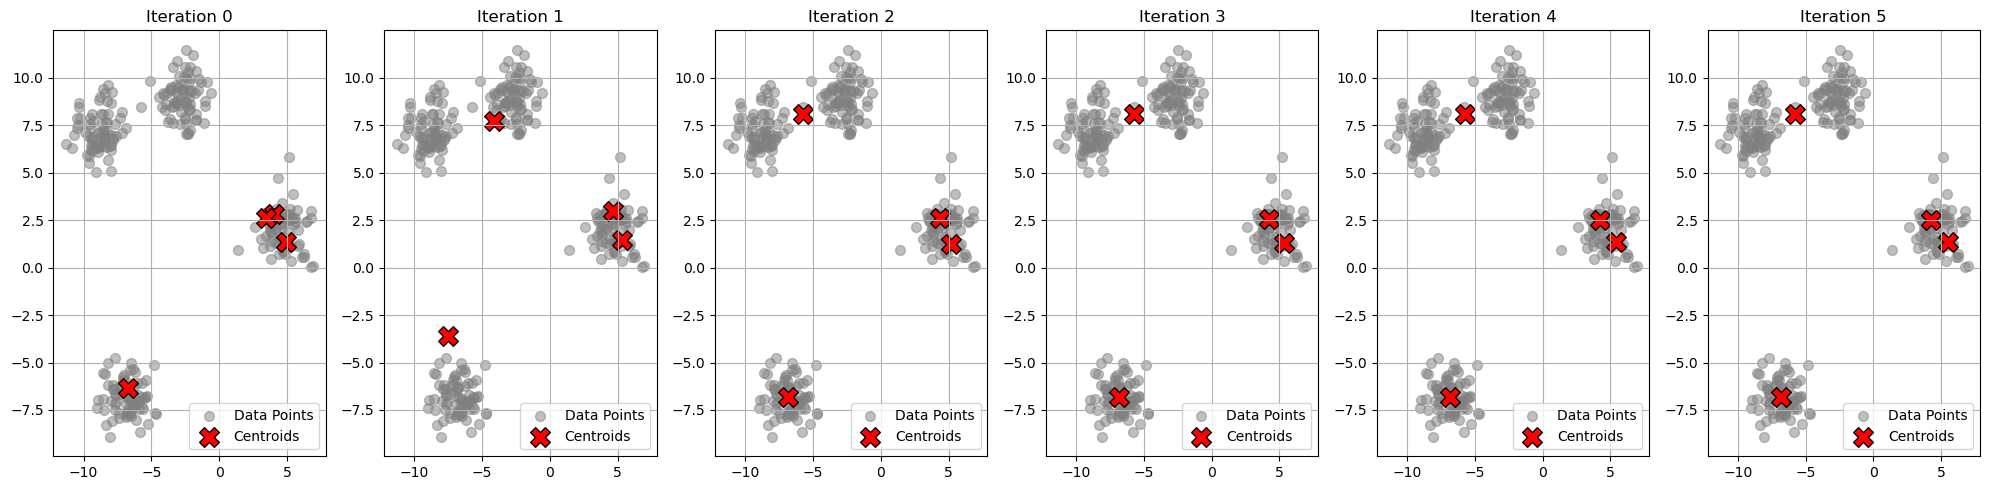

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 샘플 데이터 생성: 4개의 중심을 갖는 300개의 2차원 데이터 포인트 생성
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# KMeans 알고리즘 직접 구현 함수
def kmeans_visualization(X, k, max_iters):
    # 초기 중심점 무작위로 선택 (중복 없이 k개)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # 중심점 변화 추이를 저장할 리스트
    centroids_history = [centroids.copy()]
    
    # 지정한 횟수만큼 반복
    for _ in range(max_iters):
        # 각 데이터 포인트에 대해 모든 중심점과의 거리 계산 후, 가장 가까운 중심점의 인덱스 할당
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # 각 클러스터의 새 중심점 계산 (클러스터에 속한 점들의 평균)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # 중심점 업데이트
        centroids = new_centroids
        # 현재 중심점 저장 (시각화를 위해)
        centroids_history.append(centroids.copy())
        
    # 전체 중심점 변화 내역과 최종 클러스터 할당 결과 반환
    return centroids_history, labels

# 클러스터 개수 및 반복 횟수 설정
k = 4
max_iters = 5
centroids_history, labels = kmeans_visualization(X, k, max_iters)

# 중심점 이동 과정을 시각화
plt.figure(figsize=(20, 5))
num_plots = len(centroids_history)  # 반복 횟수 + 초기값

for i, centroids in enumerate(centroids_history):
    plt.subplot(1, num_plots, i + 1)  # subplot 위치 지정
    # 전체 데이터 점 (회색)
    plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.5, label='Data Points')
    # 현재 중심점 표시 (빨간 X)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Centroids')
    plt.title(f'Iteration {i}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

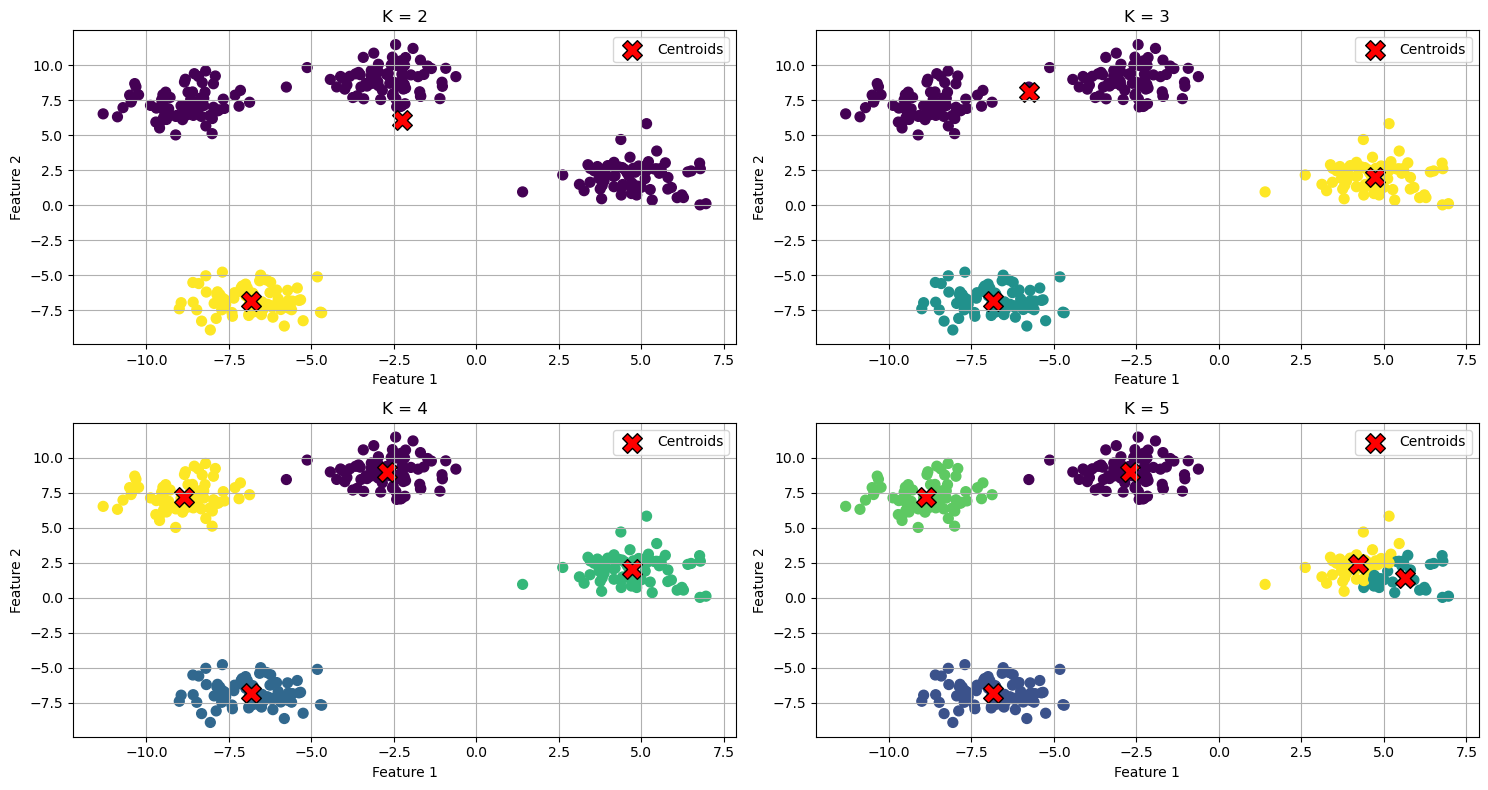

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 샘플 데이터 생성: 4개의 중심(centers)과 표준편차(cluster_std)를 갖는 300개의 데이터 포인트 생성
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 실험할 K(클러스터 개수) 값 목록 정의
K_range = [2, 3, 4, 5]

# 시각화 창 생성 (2행 2열 subplot 구성)
plt.figure(figsize=(15, 8))

# K 값마다 KMeans 클러스터링 실행 및 시각화
for i, k in enumerate(K_range, 1):  # enumerate 시작 index를 1로 지정
    # KMeans 모델 객체 생성 (k개의 클러스터, 랜덤시드 고정)
    kmeans = KMeans(n_clusters=k, random_state=42)
    # KMeans 모델에 데이터 학습 (fit)
    kmeans.fit(X)
    # 각 데이터 포인트에 대한 클러스터 할당 결과(라벨) 예측
    y_kmeans = kmeans.predict(X)

    # subplot 생성: 2x2 중 i번째 위치에 그래프 그리기
    plt.subplot(2, 2, i)
    # 각 데이터 포인트를 클러스터 라벨별로 색상을 다르게 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    # 각 클러스터 중심(centroid) 위치를 X 마커로 강조 (빨간색)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', s=200, marker='X', edgecolor='black', label='Centroids')
    # 그래프 제목 및 축 레이블 지정
    plt.title(f'K = {k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()

# 전체 subplot 레이아웃 정돈
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

# 2. 데이터 확인: 상위 5개 행 출력
print(data.head())

# 3. 산점도 행렬(pairplot)로 주요 수치형 변수 간 관계 시각화
sns.pairplot(data.drop(columns=['CustomerID']), diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 4. 필요한 피처 선택 및 전처리: 나이, 연간 소득, 지출 점수만 추출 후 표준화
numeric_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# 5. 엘보우 방법(Elbow Method)을 통해 최적 클러스터 수 탐색
inertia = []  # 각 k별 inertia(클러스터 내 거리 합 제곱) 저장
k_values = range(1, 11)  # 클러스터 개수 후보: 1~10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

# 6. 실루엣 계수(Silhouette Score)를 통한 최적 클러스터 수 탐색
silhouette_avg = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid()
plt.show()

# 7. 최적 클러스터 수로 KMeans 학습 (엘보우/실루엣 결과에 따라 수동 지정)
optimal_k = 6  # 보통 elbow plot, silhouette plot 보고 직접 선택
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# 8. 클러스터링 결과 시각화 (연간 소득 vs 지출 점수, 클러스터별 색상)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# 9. 클러스터 중심 좌표(표준화 공간상) 출력
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# 10. 여러 클러스터 수에 대한 실루엣 분석 시각화 함수 정의
def plot_silhouette_multiple(X, max_clusters):
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10  # y축 시작점
        plt.figure(figsize=(10, 7))

        for i in range(n_clusters):
            # 각 클러스터의 실루엣 계수 추출 및 정렬
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            # 실루엣 계수 값 영역 색상별로 채우기
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # 클러스터 번호 표시
            y_lower = y_upper + 10  # 다음 클러스터 시작점 설정

        plt.title(f"Silhouette plot for {n_clusters} clusters")
        plt.xlabel("Silhouette coefficient values")
        plt.ylabel("Cluster label")

        plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # 평균 실루엣 계수 선
        plt.yticks([])
        plt.xticks(np.arange(-0.1, 1.1, 0.2))
        plt.show()

# 11. 2~10개 클러스터별 실루엣 분석 반복 실행
plot_silhouette_multiple(scaled_data, max_clusters=10)

NameError: name 'data' is not defined

In [3]:
from scipy import stats
from scipy.stats import normaltest, shapiro, skew, kurtosis, anderson 

# 1. 숫자형 피처만 추출 ('CustomerID' 제외)
df_numerical = df.select_dtypes(include=[np.number]).drop(columns=['CustomerID'])

# 2. 표준 스케일러 (StandardScaler: 평균0, 표준편차1로 변환)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)
scaled_data_df = pd.DataFrame(
    scaled_data,
    columns = [f"{col}_standard" for col in df_numerical.columns]
)

# 3. scipy 기반 Z-score 변환 (각 피처별로 정규분포의 평균/표준편차에 맞춰 변환)
scaled_scipy_df = pd.DataFrame()
summary_stats = []  # 각 피처별 통계 요약 저장

for col in df_numerical.columns:
    data = df_numerical[col]
    # 정규분포(최적의 mu, sigma) 적합
    mu, sigma = stats.norm.fit(data)
    z_scores = (data - mu) / sigma    
    scaled_scipy_df[f"{col}_scipy"] = z_scores 
    
    # 각 피처별 정규성 검정 및 요약 통계
    k2, p_normaltest = normaltest(data)       # D’Agostino and Pearson’s test
    stat_shapiro, p_shapiro = shapiro(data)   # Shapiro-Wilk test
    col_skew = skew(data)                     # 왜도(skewness)
    col_kurtosis = kurtosis(data)             # 첨도(excess kurtosis)
    ad_test = anderson(data, dist='norm')     # Anderson-Darling test
    
    summary_stats.append({
        'Feature': col,
        'Mean (Fitted)' : mu,
        'Std Dev (Fitted)': sigma,
        'Skewness': col_skew,
        'Excess Kurtosis' : col_kurtosis,
        'Normaltest p-value': p_normaltest,
        'Shapiro p-value': p_shapiro,
        'Anderson stat': ad_test.statistic,
        'Anderson 5% crit': ad_test.critical_values[2]
    })

# 4. 각 피처별 정규성 및 요약통계 DataFrame 생성
summary_df = pd.DataFrame(summary_stats)

NameError: name 'df' is not defined

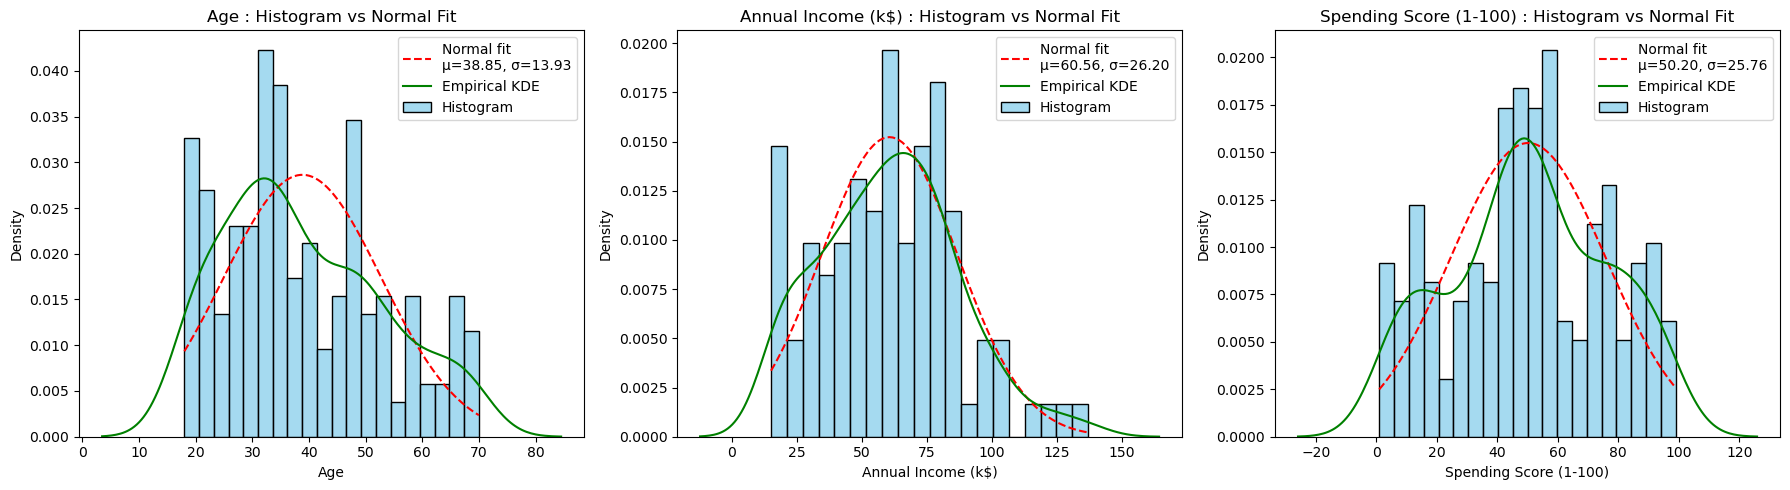

In [10]:
## 두 가지 스케일링 결과(Scipy Z-score, Standard Scaler)를 하나로 합침
scaled_combine = pd.concat([scaled_scipy_df, scaled_data_df], axis=1)

## 피처별 분포와 정규분포 적합 결과 시각화

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()  # 축 객체를 1차원 배열로 변환

for idx, col in enumerate(df_numerical.columns):
    ax = axes[idx]
    data = df_numerical[col]
    # 각 피처별 정규분포 파라미터(mu, sigma) 적합
    mu, sigma = stats.norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    # 적합된 정규분포의 확률밀도함수(pdf) 계산
    pdf = stats.norm.pdf(x, mu, sigma)
    
    # 히스토그램(확률밀도 단위) + KDE(실제 분포 추정) + 적합된 정규분포 PDF를 함께 그림
    sns.histplot(data, kde=False, stat='density', bins=20, color='skyblue', ax=ax, label='Histogram')
    ax.plot(x, pdf, 'r--', label=f"Normal fit\nμ={mu:.2f}, σ={sigma:.2f}")
    sns.kdeplot(data, color='green', ax=ax, label='Empirical KDE')
    ax.set_title(f"{col} : Histogram vs Normal Fit")
    ax.legend()
    
plt.tight_layout()
plt.show()


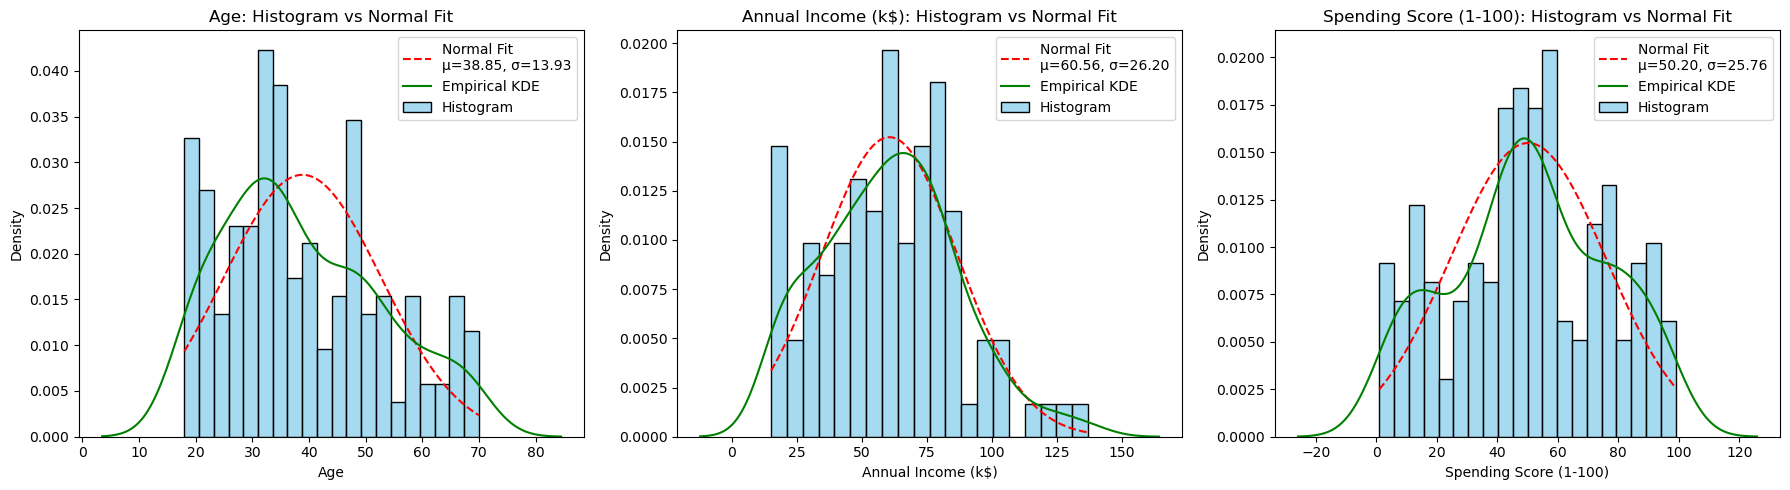

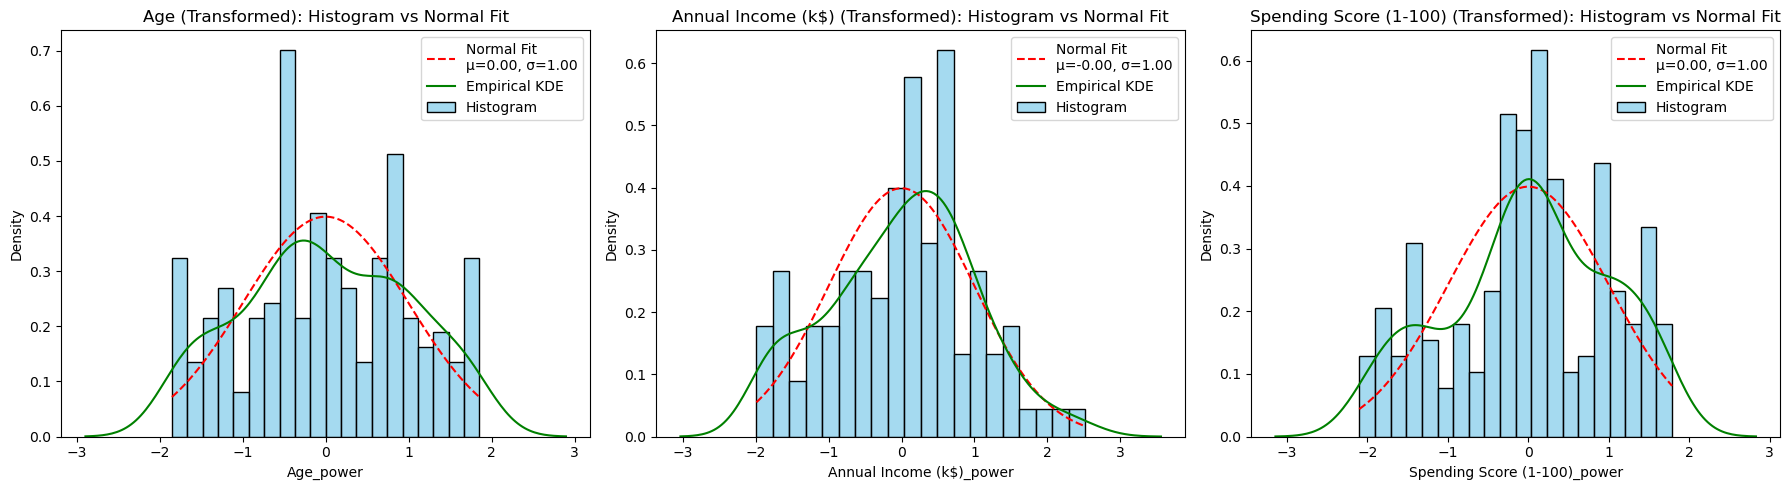


 [Normality Test Summary]
                  Feature  Mean (Fitted)  Std Dev (Fitted)  Skewness  \
0                     Age          38.85           13.9340    0.4819   
1      Annual Income (k$)          60.56           26.1990    0.3194   
2  Spending Score (1-100)          50.20           25.7589   -0.0469   

   Excess Kurtosis  Normaltest p-value  Shapiro p-value  Anderson stat  \
0          -0.6848              0.0004           0.0000         2.4891   
1          -0.1259              0.1728           0.0035         0.6844   
2          -0.8360              0.0003           0.0002         1.3506   

   Anderson 5% crit  
0             0.772  
1             0.772  
2             0.772  

 [Scaled Feature Samples]
   Age_scipy  Annual Income (k$)_scipy  Spending Score (1-100)_scipy  \
0  -1.424569                 -1.738999                     -0.434801   
1  -1.281035                 -1.738999                      1.195704   
2  -1.352802                 -1.700830                  

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
from scipy.stats import normaltest, shapiro, skew, kurtosis, anderson

# 1. 데이터 불러오기 및 수치형 피처 선택 (CustomerID 제외)
df = pd.read_csv("Mall_Customers.csv")
df_numerical = df.select_dtypes(include=[np.number]).drop(columns=["CustomerID"])

# 2. (1) Standard Scaler: 평균 0, 표준편차 1로 변환
scaler = StandardScaler()
scaled_standard = scaler.fit_transform(df_numerical)
scaled_standard_df = pd.DataFrame(
    scaled_standard, 
    columns=[f"{col}_standard" for col in df_numerical.columns]
)

# 3. (2) Scipy Z-score: 각 피처별로 정규분포(mu, sigma) fit 후 표준화
scaled_scipy_df = pd.DataFrame()
summary_stats = []

for col in df_numerical.columns:
    data = df_numerical[col]
    mu, sigma = stats.norm.fit(data)   # 정규분포 적합(평균, 표준편차)
    z_scores = (data - mu) / sigma     # 직접 z-score 변환
    scaled_scipy_df[f"{col}_scipy"] = z_scores

    # 정규성 및 분포 통계 요약 (skew, kurtosis, normaltest, shapiro, anderson)
    k2, p_normaltest = normaltest(data)
    stat_shapiro, p_shapiro = shapiro(data)
    col_skew = skew(data)
    col_kurtosis = kurtosis(data)
    ad_test = anderson(data, dist='norm')

    summary_stats.append({
        "Feature": col,
        "Mean (Fitted)": mu,
        "Std Dev (Fitted)": sigma,
        "Skewness": col_skew,
        "Excess Kurtosis": col_kurtosis,
        "Normaltest p-value": p_normaltest,
        "Shapiro p-value": p_shapiro,
        "Anderson stat": ad_test.statistic,
        "Anderson 5% crit": ad_test.critical_values[2]
    })

# 4. 정규성 및 요약 통계 데이터프레임 생성
summary_df = pd.DataFrame(summary_stats)

# 5. 모든 스케일링 결과 합치기 (비교 목적)
scaled_combined = pd.concat([scaled_scipy_df, scaled_standard_df], axis=1)

# 6. 원본 분포 및 정규분포 적합 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

for idx, col in enumerate(df_numerical.columns):
    ax = axes[idx]
    data = df_numerical[col]
    mu, sigma = stats.norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    pdf = stats.norm.pdf(x, mu, sigma)

    sns.histplot(data, kde=False, stat="density", bins=20, color='skyblue', ax=ax, label="Histogram")
    ax.plot(x, pdf, 'r--', label=f"Normal Fit\nμ={mu:.2f}, σ={sigma:.2f}")
    sns.kdeplot(data, color='green', ax=ax, label="Empirical KDE")
    ax.set_title(f"{col}: Histogram vs Normal Fit")
    ax.legend()

plt.tight_layout()
plt.show()

# 7. (3) PowerTransformer (Yeo-Johnson): 정규성 향상 변환
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = pt.fit_transform(df_numerical)
df_transformed_df = pd.DataFrame(
    df_transformed, 
    columns=[f"{col}_power" for col in df_numerical.columns]
)

# 8. 변환된 데이터의 분포와 정규분포 적합 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

for idx, col in enumerate(df_numerical.columns):
    ax = axes[idx]
    transformed_col = df_transformed_df.iloc[:, idx]
    mu, sigma = stats.norm.fit(transformed_col)
    x = np.linspace(transformed_col.min(), transformed_col.max(), 100)
    pdf = stats.norm.pdf(x, mu, sigma)

    sns.histplot(transformed_col, kde=False, stat="density", bins=20, color='skyblue', ax=ax, label="Histogram")
    ax.plot(x, pdf, 'r--', label=f"Normal Fit\nμ={mu:.2f}, σ={sigma:.2f}")
    sns.kdeplot(transformed_col, color='green', ax=ax, label="Empirical KDE")
    ax.set_title(f"{df_numerical.columns[idx]} (Transformed): Histogram vs Normal Fit")
    ax.legend()

plt.tight_layout()
plt.show()

# 9. 통계 요약 및 일부 변환 샘플 출력
print("\n [Normality Test Summary]")
print(summary_df.round(4))

print("\n [Scaled Feature Samples]")
print(scaled_combined.head())

print("\n [Power-Transformed Feature Samples]")
print(df_transformed_df.head())

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

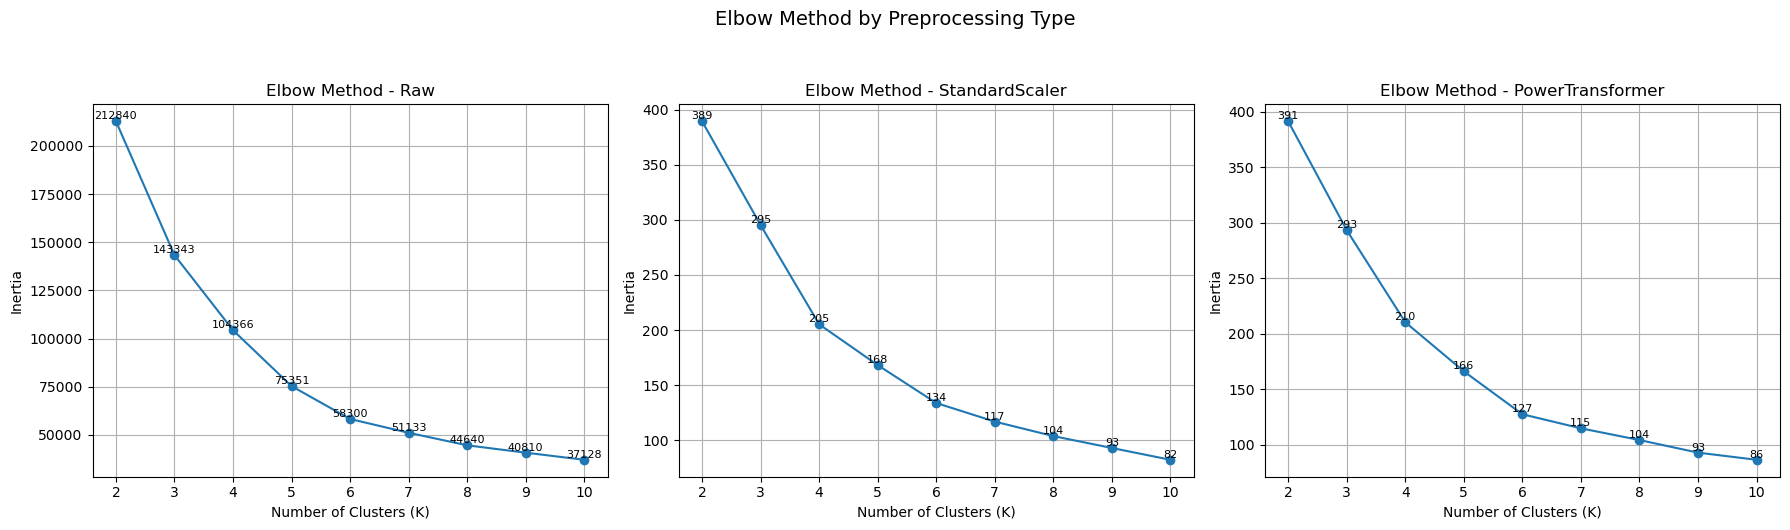

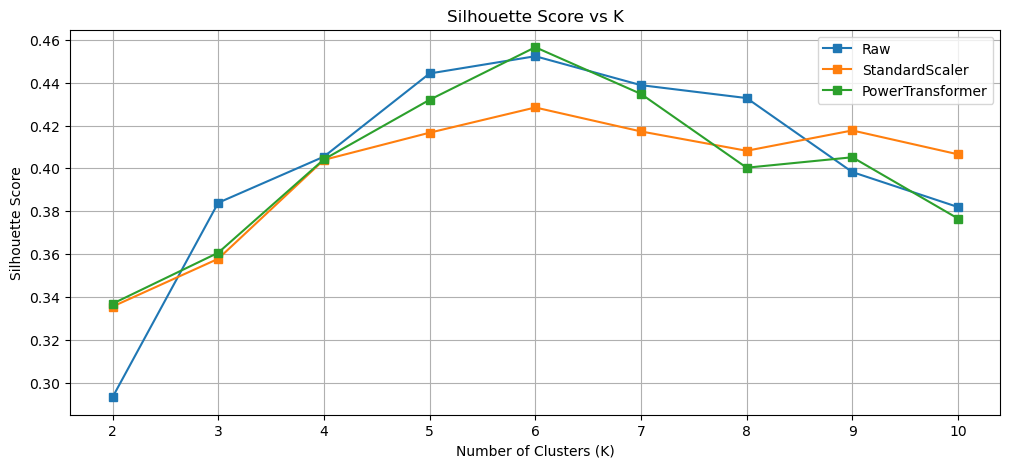

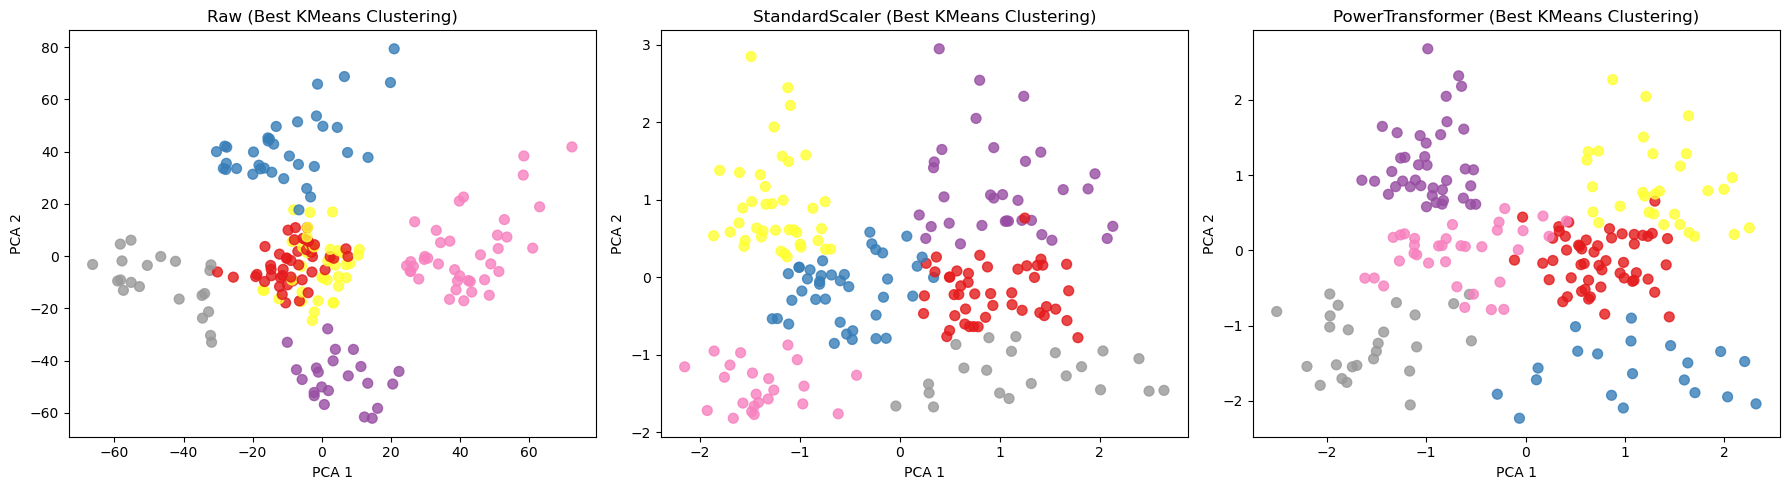

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. 원본/스케일/정규분포화 데이터 준비
X_raw = df_numerical.values                       # 원본 데이터
X_standard = scaled_standard                      # StandardScaler 결과
X_power = df_transformed                          # PowerTransformer 결과

datasets = {
    "Raw": X_raw,
    "StandardScaler": X_standard,
    "PowerTransformer": X_power
}

# 2. 평가 결과 저장할 컨테이너 초기화
elbow_results = {}         # 각 K별 inertia(Elbow plot용)
silhouette_results = {}    # 각 K별 실루엣 점수
best_labels = {}           # 최적 K (실루엣 최고점)일 때 군집 레이블
pca_2d = {}                # 2차원 PCA 변환 결과(시각화용)

# 3. 각 데이터셋별로 KMeans 클러스터링 및 평가 반복
K_range = range(2, 11)  # K: 2~10

for name, X in datasets.items():
    inertias = []
    silhouettes = []
    best_k = None
    best_score = -1
    best_k_labels = None

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        inertia = kmeans.inertia_
        score = silhouette_score(X, labels)

        inertias.append(inertia)      # 군집내 거리합(Elbow method)
        silhouettes.append(score)     # 실루엣 점수

        # 최적 K 저장 (실루엣 점수 기준)
        if score > best_score:
            best_score = score
            best_k = k
            best_k_labels = labels

    elbow_results[name] = inertias
    silhouette_results[name] = silhouettes
    best_labels[name] = best_k_labels
    pca_2d[name] = PCA(n_components=2).fit_transform(X)

# 4. Elbow Method (K별 inertia) 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, name in zip(axes, datasets.keys()):
    inertias = elbow_results[name]
    ax.plot(K_range, inertias, marker='o', color='tab:blue')
    ax.set_title(f"Elbow Method - {name}")
    ax.set_xlabel("Number of Clusters (K)")
    ax.set_ylabel("Inertia")
    ax.grid(True)
    # inertia 값 그래프에 표시
    for i, val in enumerate(inertias):
        ax.text(K_range[i], val, f"{val:.0f}", fontsize=8, ha='center', va='bottom')

plt.suptitle("Elbow Method by Preprocessing Type", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# 5. Silhouette Score vs K 시각화 (스케일링별로 한 그래프에)
plt.figure(figsize=(12, 5))
for name in datasets:
    plt.plot(K_range, silhouette_results[name], marker='s', label=name)
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

# 6. PCA 기반 2차원 시각화 (각 전처리의 best K 기준 클러스터 결과)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, name in zip(axes, datasets.keys()):
    ax.scatter(
        pca_2d[name][:, 0], pca_2d[name][:, 1],
        c=best_labels[name], cmap='Set1', s=50, alpha=0.8
    )
    ax.set_title(f"{name} (Best KMeans Clustering)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()



Raw Data
Raw For n_clusters = 2, the average silhouette_score is : 0.2932


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


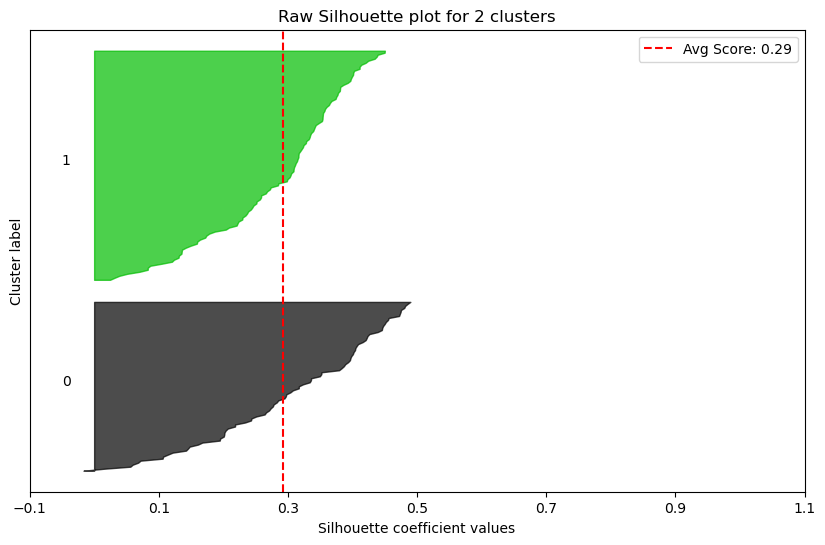

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Raw For n_clusters = 3, the average silhouette_score is : 0.3839


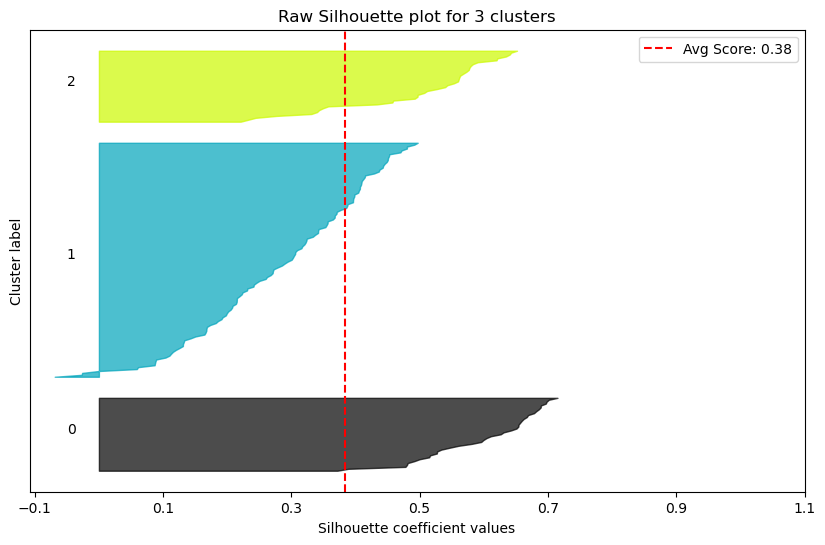

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Raw For n_clusters = 4, the average silhouette_score is : 0.4055


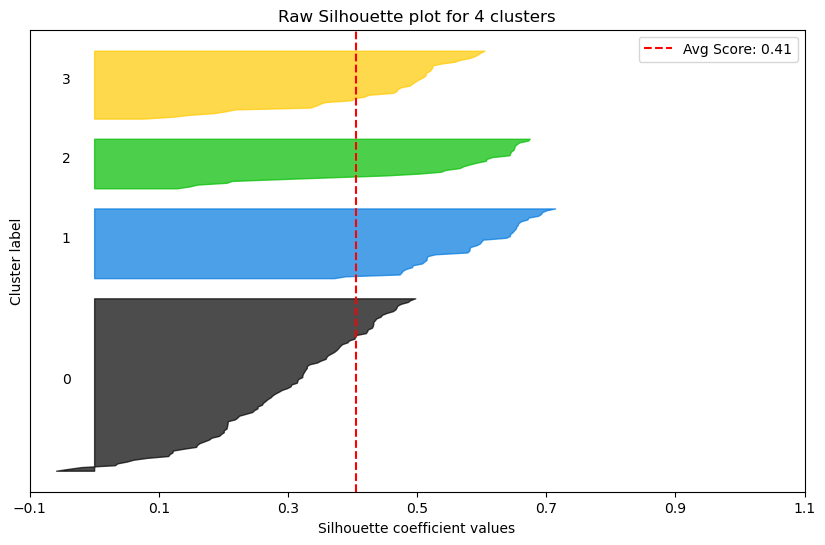

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Raw For n_clusters = 5, the average silhouette_score is : 0.4443


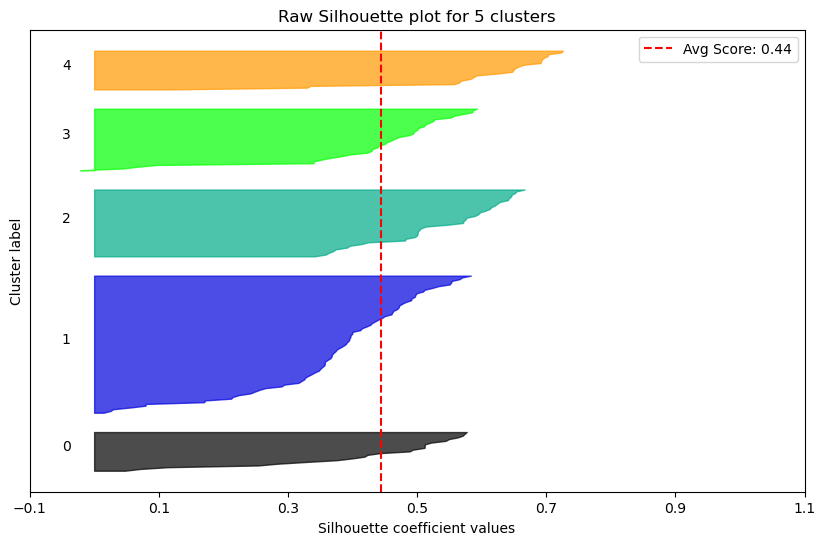

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Raw For n_clusters = 6, the average silhouette_score is : 0.4523


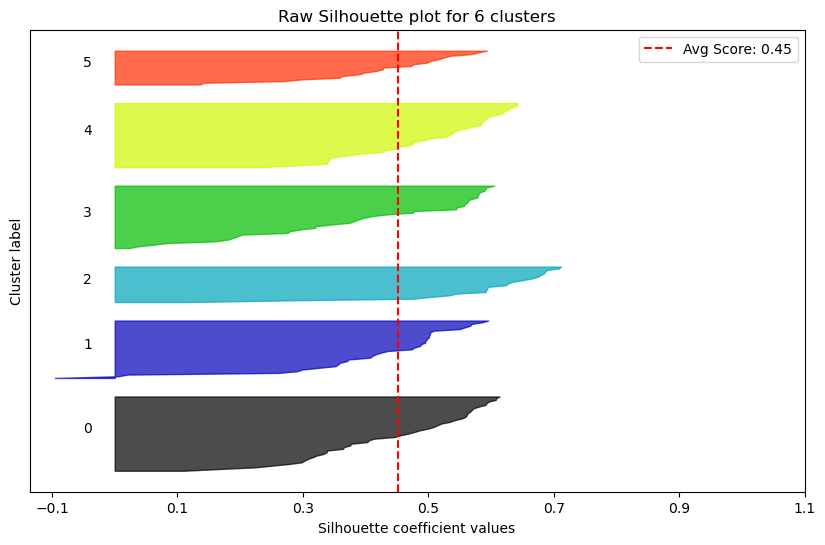



Standard Scaled Data
StandardScaler For n_clusters = 2, the average silhouette_score is : 0.3355


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


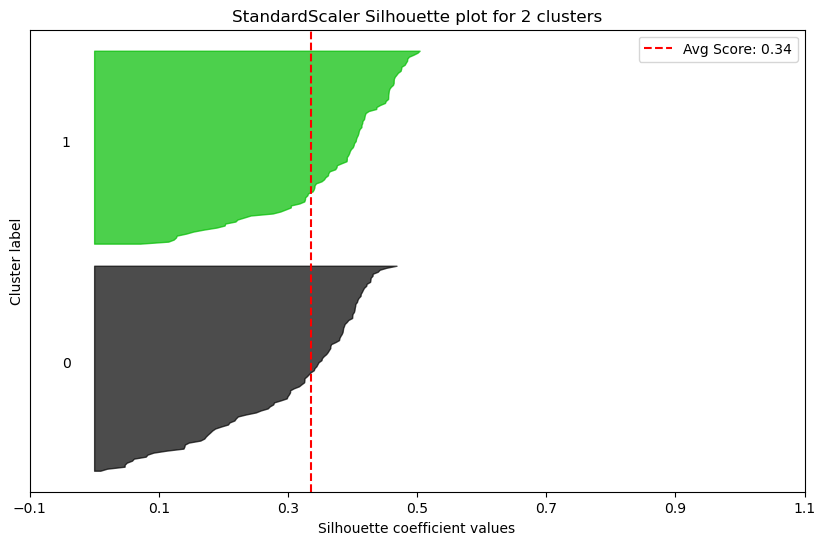

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


StandardScaler For n_clusters = 3, the average silhouette_score is : 0.3578


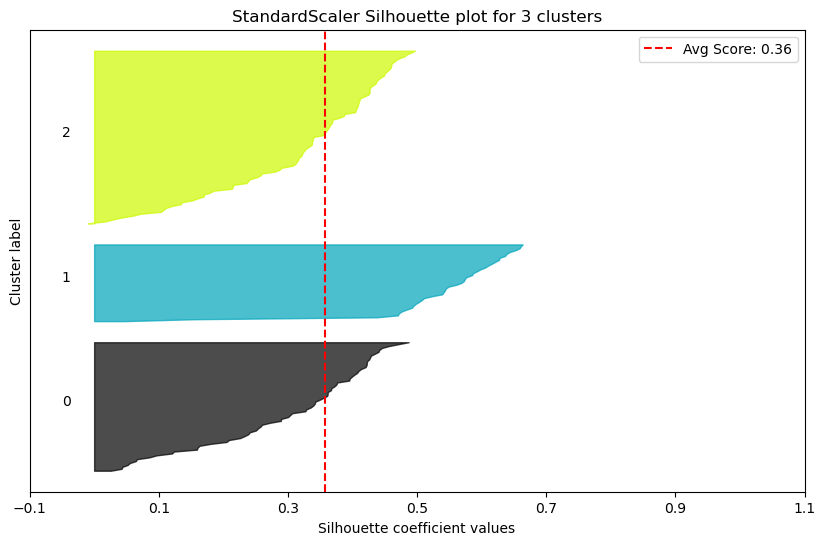

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


StandardScaler For n_clusters = 4, the average silhouette_score is : 0.4040


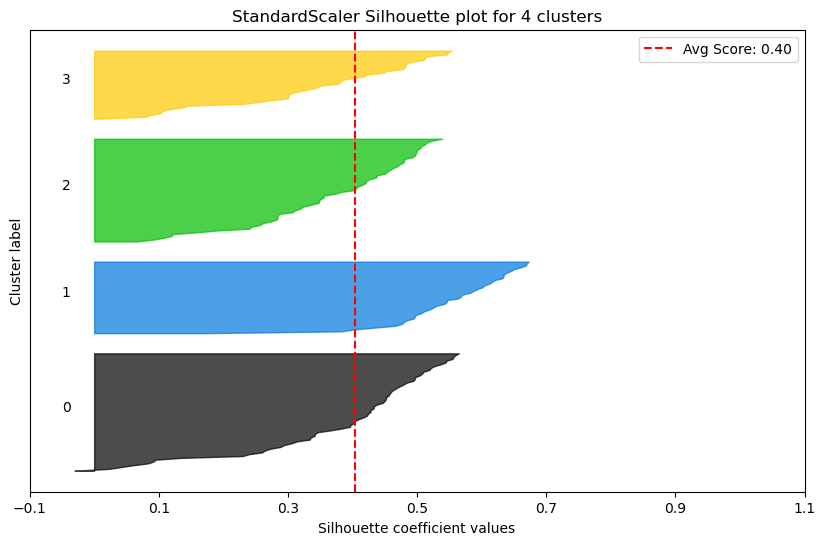

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


StandardScaler For n_clusters = 5, the average silhouette_score is : 0.4166


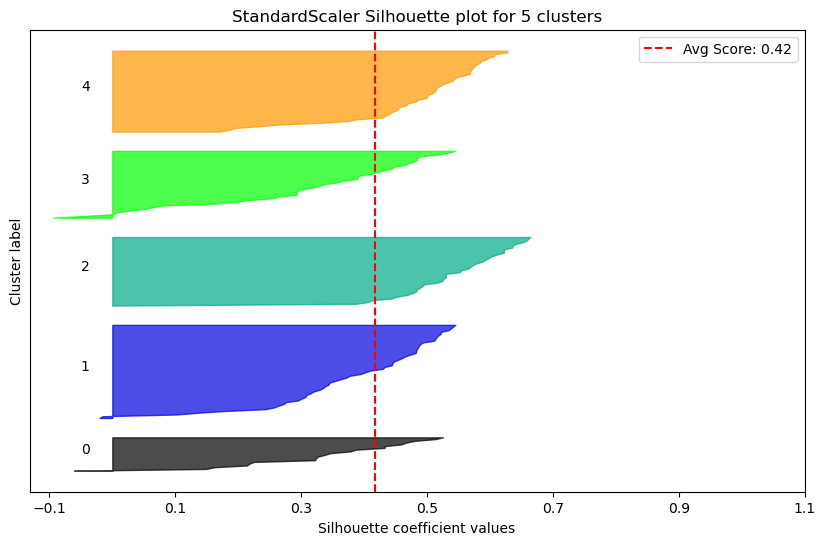

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


StandardScaler For n_clusters = 6, the average silhouette_score is : 0.4284


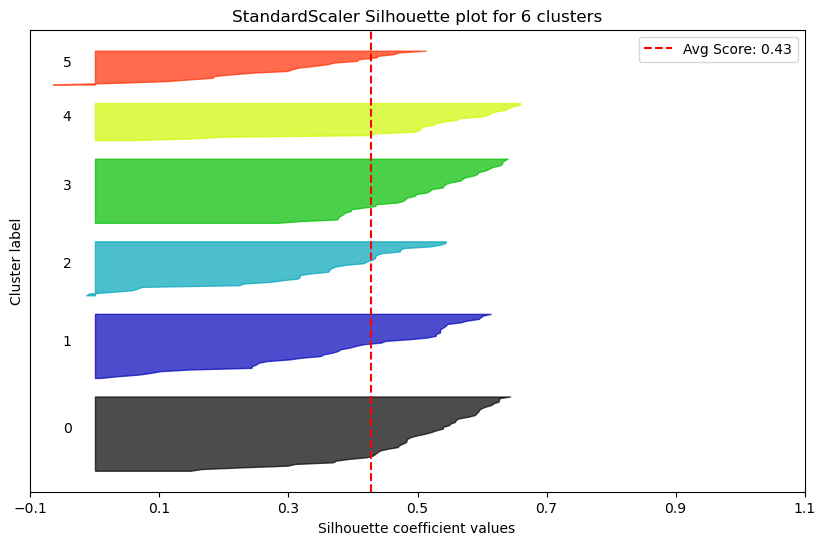



PowerTransformed Data
PowerTransformer For n_clusters = 2, the average silhouette_score is : 0.3368


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


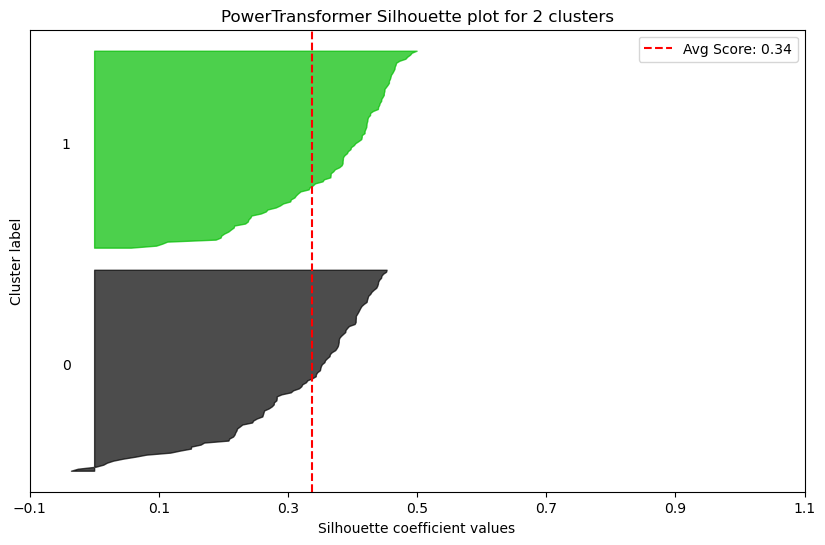

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PowerTransformer For n_clusters = 3, the average silhouette_score is : 0.3606


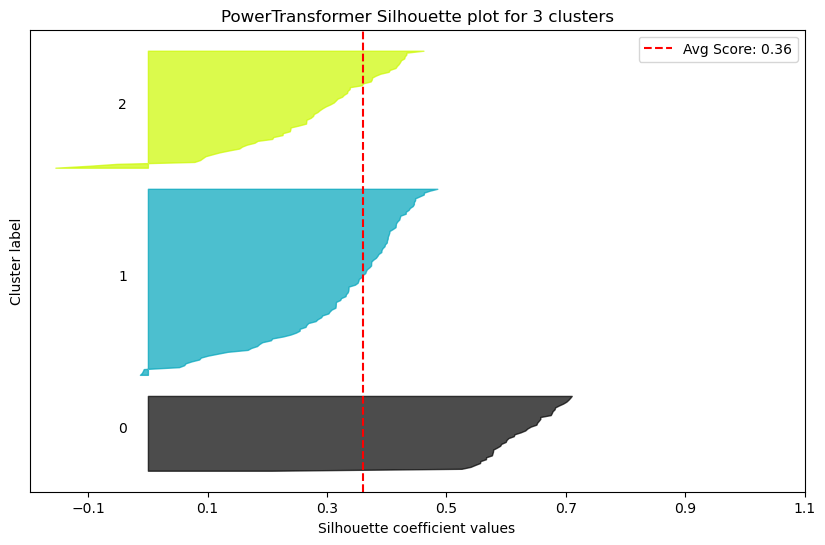

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PowerTransformer For n_clusters = 4, the average silhouette_score is : 0.4042


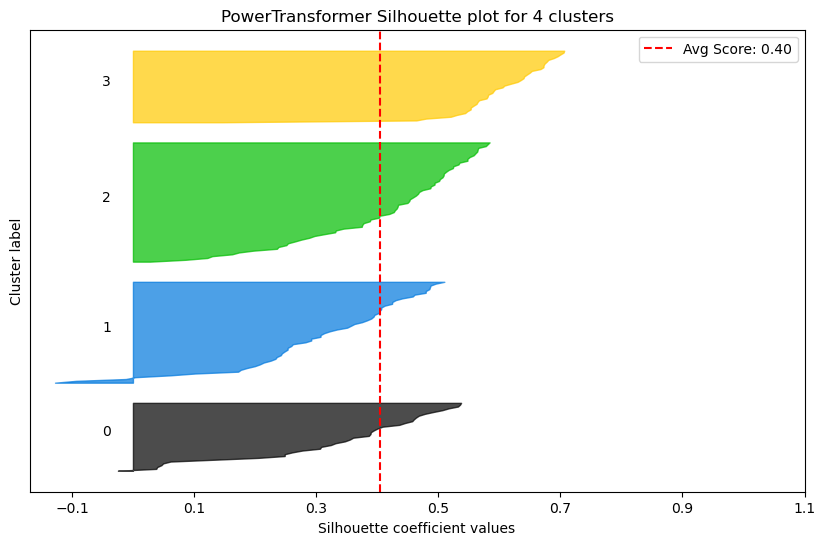

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PowerTransformer For n_clusters = 5, the average silhouette_score is : 0.4320


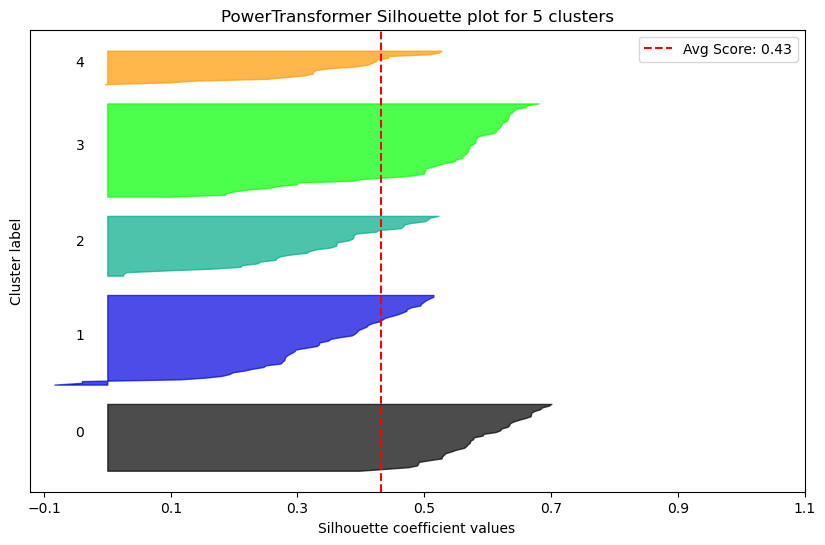

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


PowerTransformer For n_clusters = 6, the average silhouette_score is : 0.4565


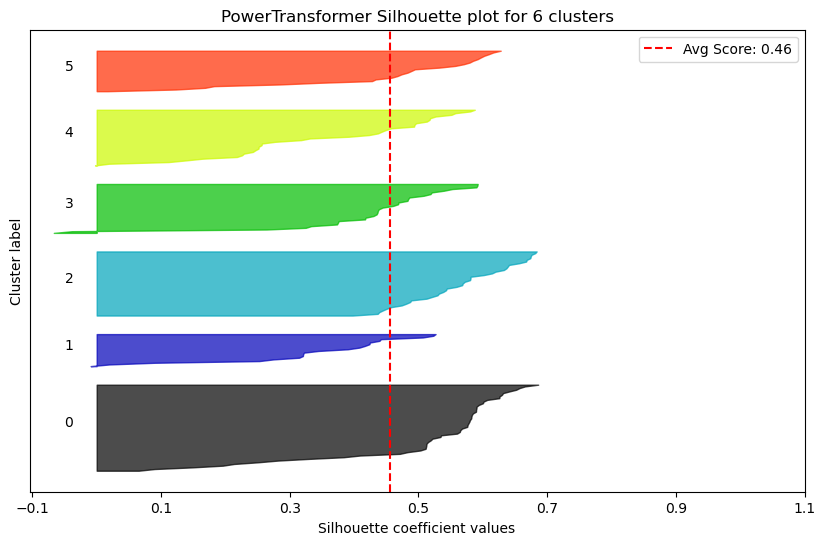

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 실루엣 분석과 시각화를 위한 함수 정의
def plot_silhouette_multiple(X, max_clusters=10, title_prefix=""):
    """
    여러 클러스터 수(n_clusters)에 대해 Silhouette plot을 반복적으로 출력하는 함수.
    각 K마다 평균 실루엣 점수와 군집별 실루엣 분포를 시각화한다.
    """
    for n_clusters in range(2, max_clusters + 1):
        # KMeans 모델 학습 및 예측
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)

        # 전체 평균 실루엣 점수 계산
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"{title_prefix} For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

        # 각 샘플별 실루엣 점수 계산
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10  # y축 시작점 (군집 간 구분을 위한 간격)
        plt.figure(figsize=(10, 6))

        # 각 군집별로 실루엣 점수 분포 시각화
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()  # 실루엣 점수 오름차순 정렬

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 각 군집의 중간 위치에 군집 번호 표시
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 다음 군집의 시작 위치

        plt.title(f"{title_prefix} Silhouette plot for {n_clusters} clusters")
        plt.xlabel("Silhouette coefficient values")
        plt.ylabel("Cluster label")
        # 전체 평균 실루엣 점수에 세로선 추가
        plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg Score: {silhouette_avg:.2f}")
        plt.yticks([])
        plt.xticks(np.arange(-0.1, 1.1, 0.2))
        plt.legend()
        plt.show()

# 각 전처리 결과별로 실루엣 분석 반복 실행
print("\n\nRaw Data")
plot_silhouette_multiple(df_numerical.values, max_clusters=6, title_prefix="Raw")

print("\n\nStandard Scaled Data")
plot_silhouette_multiple(scaled_standard, max_clusters=6, title_prefix="StandardScaler")

print("\n\nPowerTransformed Data")
plot_silhouette_multiple(df_transformed, max_clusters=6, title_prefix="PowerTransformer")